In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/feature selection/after data augmentation/data/augmented_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all.csv')

#input and output variables
y = data.iloc[:, -1].values
X = data.iloc[:, :-1].values
print(X.shape)

rfc = RandomForestClassifier(max_depth=100, random_state=42)
clf = RFECV(rfc, step=1, cv=5)
clf.fit(X, y)

print("Optimal number of features : ", clf.n_features_)

print(clf.ranking_)


(553, 916)
Optimal number of features :  56
[856 855 854 853 839 838 831 830 819 816 814 810 792 787 782 781 779 777
 776 706 701   1 131  87 195 197   1 150 228 124  76 286 220 265   1 149
  47 123 337  80 182 359 208 158   1 181 371 226 490 184 347 435 128   1
  98 199 180  52  28 216 261 252 380   1 292 233 205   1 272 302 242 224
   1 557 116 509 313 420 125 582 573 543   1 550 364 334 463 162  78 308
 191 396  30 414 428 450 426 270 499 740 368 568 319 102 684 484 696 284
 508 322 478 712 495 268 527 327 580 245 564 471 126 383 369 310  32 227
 644 241 489 249  65 566 183 516 283 799 394 409  38   1 540 465  23 279
  59 177 336 300 318 167 370 716 148 211 291 665 264 551 188 397   1 858
 592 166 455 267 135 454   1 287 496   1 825 643   1 440 456  95 562 142
   1  77 511 772 658 469 625 575 574 764 587 140 173 209 579 559 342 288
 293 811 187 738  83 424 544 542 186 561 835 805 857 588 338 727   1   1
 430 734 432 144 152 120  11 585 210 438 221  13 301 743   1 534 236 127
 262 13

In [ ]:
# Get the indices of the selected features
selected_feature_indices = np.where(clf.support_)[0]

# Get the names of the optimal features
optimal_features = data.columns[selected_feature_indices]

print("Optimal features: ", optimal_features)
# Convert optimal_features to a DataFrame with a single column
optimal_features_df = pd.DataFrame({'Optimal Features': optimal_features})

# Save the DataFrame to a CSV file
optimal_features_df.to_csv('/content/drive/MyDrive/thesis/Redo/feature selection/after data augmentation/data/beta_severity_lfc_1_nosm_optimal_features_after_DA.csv', index=False)

Optimal features:  Index(['ADRB1', 'HHAT', 'LTK', 'RORA', 'DHRS9', 'MID2', 'TRAF5', 'ABCB1',
       'NRCAM', 'DNTT', 'CEP126', 'ST8SIA1', 'BACH2', 'GPR63', 'CLIC5',
       'CD160', 'SERPINC1', 'ECRG4', 'ADGRB2', 'ZNF831', 'GNRH2', 'AMOT',
       'MCHR1', 'ACE2', 'ALOX5AP', 'TXN', 'CCDC65', 'UNC45B', 'SLC4A10',
       'RADX', 'SYBU', 'PID1', 'IKZF3', 'ZSWIM5', 'SALL2', 'SPRED1', 'HTR3A',
       'TCTN2', 'OTUD7A', 'CD8B', 'LRRN3', 'TNK1', 'TIMM23B.AGAP6', 'AMIGO1',
       'FAM167B', 'PTCH1', 'TTC24', 'MYO6', 'ZNF239', 'KIAA1671', 'GOLGA6L9',
       'MAGEE1', 'OR52B4', 'SPON1', 'NFILZ', 'ZNF280B'],
      dtype='object')


In [ ]:
#print all the features
# Get the indices of the selected features
selected_feature_indices = np.where(clf.support_)[0]

# Get the names of the optimal features
optimal_features = data.columns[selected_feature_indices]

# Set the maximum number of items to be displayed to the total number of optimal features
np.set_printoptions(threshold=len(optimal_features))

print("Optimal features: ", optimal_features)

Optimal features:  Index(['ADRB1', 'HHAT', 'LTK', 'RORA', 'DHRS9', 'MID2', 'TRAF5', 'ABCB1',
       'NRCAM', 'DNTT', 'CEP126', 'ST8SIA1', 'BACH2', 'GPR63', 'CLIC5',
       'CD160', 'SERPINC1', 'ECRG4', 'ADGRB2', 'ZNF831', 'GNRH2', 'AMOT',
       'MCHR1', 'ACE2', 'ALOX5AP', 'TXN', 'CCDC65', 'UNC45B', 'SLC4A10',
       'RADX', 'SYBU', 'PID1', 'IKZF3', 'ZSWIM5', 'SALL2', 'SPRED1', 'HTR3A',
       'TCTN2', 'OTUD7A', 'CD8B', 'LRRN3', 'TNK1', 'TIMM23B.AGAP6', 'AMIGO1',
       'FAM167B', 'PTCH1', 'TTC24', 'MYO6', 'ZNF239', 'KIAA1671', 'GOLGA6L9',
       'MAGEE1', 'OR52B4', 'SPON1', 'NFILZ', 'ZNF280B'],
      dtype='object')


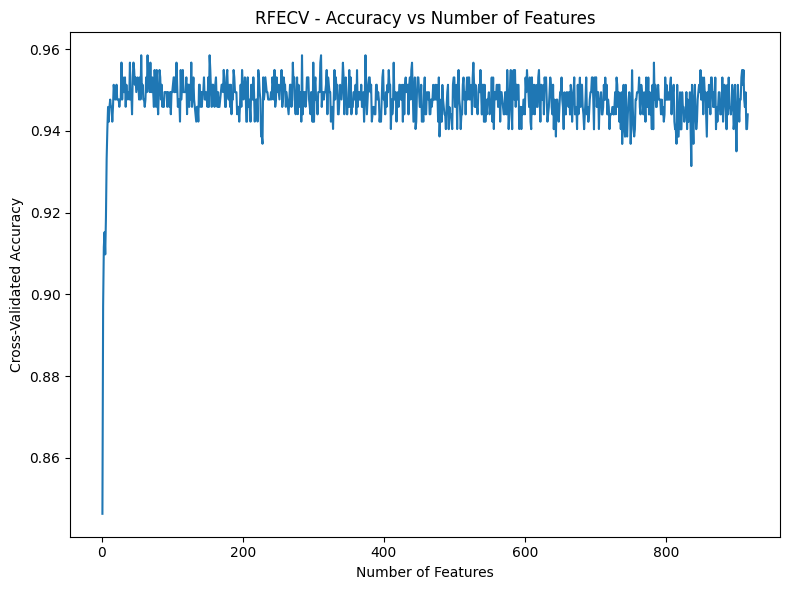

In [ ]:
#relationship between the number of features used in the RandomForestClassifier and the corresponding cross-validated
# accuracy during the RFECV (Recursive Feature Elimination with Cross-Validation) process
# Plot accuracy versus number of features
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(clf.cv_results_['mean_test_score']) + 1), clf.cv_results_['mean_test_score'])
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFECV - Accuracy vs Number of Features")
plt.tight_layout()
plt.show()

Top 15 Important Features:
TCTN2: 0.0878965788266878
ZNF239: 0.08365669909294933
SPON1: 0.0833320169370395
SLC4A10: 0.0692892124805906
AMOT: 0.05633087964799083
ZNF831: 0.05280071622940415
ZNF280B: 0.05235294923479958
MAGEE1: 0.051294749932216874
GOLGA6L9: 0.035214137242155684
CCDC65: 0.0333932100945116
HHAT: 0.03061475468219296
OTUD7A: 0.02839848352061529
CEP126: 0.02518078713905289
DNTT: 0.018847256938157128
ZSWIM5: 0.01684231183954404


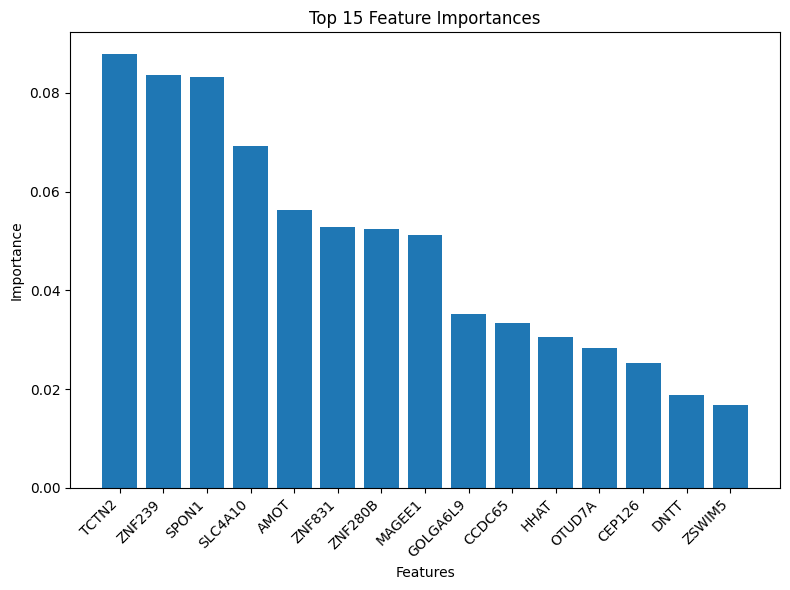

In [ ]:
# Get the indices of the top 15 important features
top_15_indices = np.argsort(feature_importances)[::-1][:15]

# Get the names and importances of the top 15 features
top_15_features = optimal_features[top_15_indices]
top_15_importances = feature_importances[top_15_indices]

# Print top 15 important features and their importances
print("Top 15 Important Features:")
for feature, importance in zip(top_15_features, top_15_importances):
    print(f"{feature}: {importance}")


# Plot top 15 feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_15_features)), top_15_importances)
plt.xticks(range(len(top_15_features)), top_15_features, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()